### Calculate the voltage for a number of field steps evenly distributed in logaritmic scale

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Layout

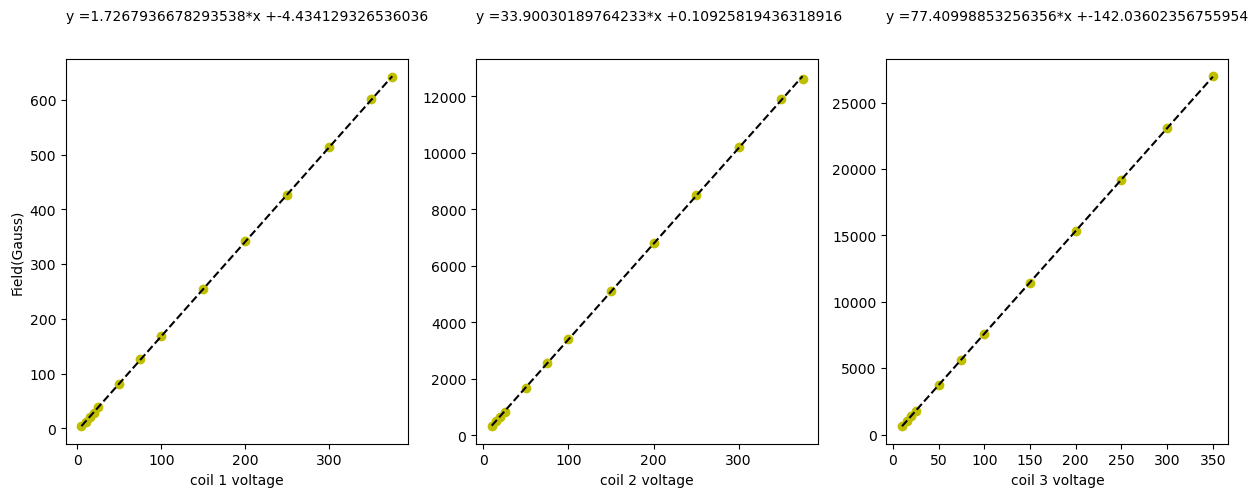

In [7]:
coil1 = pd.DataFrame(columns =['voltage','Field'])
coil1['voltage'] = [5,10,15,20,25,50,75,100,150,200,250,300,350,375]
coil1['Field'] = [4,12,21,29,40,81,126,169,255,342,427,514,601,641]   #Gauss
coil1_coef = np.polyfit(coil1['voltage'],coil1['Field'],1)   # m and n coefficients for linear function Y = mX + n
coil1_poly1d = np.poly1d(coil1_coef)                         # a function which takes in x and returns an estimate for y

coil2 = pd.DataFrame(columns =['voltage','Field'])
coil2['voltage'] = [10,15,20,25,50,75,100,150,200,250,300,350,375]
coil2['Field'] = np.array([0.32,0.49,0.66,0.84,1.69,2.55,3.4,5.11,6.81,8.52,10.2,11.9,12.6])*1000
coil2_coef = np.polyfit(coil2['voltage'],coil2['Field'],1)
coil2_poly1d = np.poly1d(coil2_coef) 

coil3 = pd.DataFrame(columns =['voltage','Field'])
coil3['voltage'] = [10,15,20,25,50,75,100,150,200,250,300,350]
coil3['Field'] = np.array([0.669,1.046,1.434,1.807,3.715,5.632,7.551,11.43,15.32,19.21,23.09,26.99])*1000
coil3_coef = np.polyfit(coil3['voltage'],coil3['Field'],1)
coil3_poly1d = np.poly1d(coil3_coef) 


#plot figure
fig = plt.figure(figsize=(15, 5))
# coil 1
ax1 = fig.add_subplot(1,3,1)
ax1.plot(coil1['voltage'],coil1['Field'], 'yo',
         coil1['voltage'], coil1_poly1d(coil1['voltage']), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlabel('coil 1 voltage')
plt.ylabel('Field(Gauss)')
ax1.annotate('y =' +str(coil1_coef[0])+'*x +'+ str(coil1_coef[1]), (0, 1.1), xycoords = 'axes fraction')

# coil 2
ax2 = fig.add_subplot(1,3,2)
ax2.plot(coil2['voltage'],coil2['Field'], 'yo',
         coil2['voltage'], coil2_poly1d(coil2['voltage']), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlabel('coil 2 voltage')
ax2.annotate('y =' +str(coil2_coef[0])+'*x +'+ str(coil2_coef[1]), (0, 1.1), xycoords = 'axes fraction')

# coil 3
ax3 = fig.add_subplot(1,3,3)
ax3.plot(coil3['voltage'],coil3['Field'], 'yo',
         coil3['voltage'], coil3_poly1d(coil3['voltage']), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlabel('coil 3 voltage')
ax3.annotate('y =' +str(coil3_coef[0])+'*x +'+ str(coil3_coef[1]), (0, 1.1), xycoords = 'axes fraction')

plt.show()

### select field max and steps

In [3]:
MaxFieldS = widgets.FloatSlider(
    value=10000,
    min=0,
    max= 27000,
    step=1,
    description='Max Field(Gauss):',
    layout=Layout(width='50%', height='30px'),
    style= {'description_width': 'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
MaxFieldT = widgets.BoundedFloatText(
    value=0,
    min=0,
    max=27000,
    step=1,
    description='Max Field(Gauss):',
    style= {'description_width': 'initial'},
    disabled=False
)

Steps = widgets.BoundedFloatText(
    value=20,
    min=0,
    max=100,
    step=1,
    description='Steps:',
    style= {'description_width': 'initial'},
    disabled=False
)

box1 = widgets.HBox([MaxFieldS,MaxFieldT])
widgetLink = widgets.jslink((MaxFieldS, 'value'), (MaxFieldT, 'value'))

display(box1,Steps)

BoundedFloatText(value=20.0, description='Steps:', step=1.0, style=DescriptionStyle(description_width='initial…

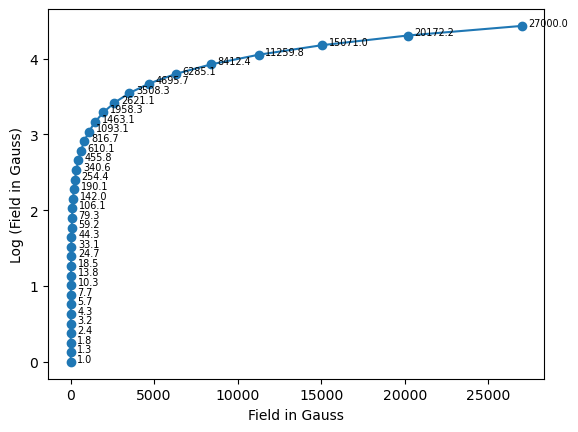

In [8]:
#Fieldmax = MaxFieldS.value           #Gauss (=10E-4 T)
LogFieldmax = np.log10(MaxFieldS.value)
steps = Steps.value
field = np.append(10**(np.arange(0,LogFieldmax, LogFieldmax/steps)), [10**LogFieldmax])
log_field = np.log10(field)
plt.plot(field,log_field)
plt.scatter(field,log_field)
plt.xlabel('Field in Gauss')
plt.ylabel('Log (Field in Gauss)')
for i, txt in enumerate(field):
    plt.annotate(field[i].round(1), (field[i]+400, log_field[i]), size = 7)
plt.show()

In [9]:
coil1_volt = (field - coil1_coef[1])/coil1_coef[0]
coil2_volt = (field - coil2_coef[1])/coil2_coef[0]
coil3_volt = (field - coil3_coef[1])/coil3_coef[0]

#build DataFrame
irm_volt =pd.DataFrame(columns = ['Field','Volts_coil1','Volts_coil2','Volts_coil3'])
irm_volt['Field'] = field
irm_volt['Volts_coil1'] = coil1_volt
irm_volt['Volts_coil2'] = coil2_volt
irm_volt['Volts_coil3'] = coil3_volt

irm_volt = irm_volt.set_index('Field')
irm_volt = irm_volt[irm_volt<400]      #voltage limit of regression lines
irm_volt.round(4)

,Volts_coil1,Volts_coil2,Volts_coil3
Field,,,
1.000000,3.1469,0.0263,1.8478
1.338475,3.3430,0.0363,1.8521
1.791516,3.6053,0.0496,1.8580
2.397901,3.9565,0.0675,1.8658
3.209531,4.4265,0.0915,1.8763
4.295878,5.0556,0.1235,1.8903
5.749927,5.8977,0.1664,1.9091
7.696136,7.0247,0.2238,1.9343
10.301089,8.5333,0.3006,1.9679
